## Máy học nâng cao - Lab 01
## Họ tên: Nguyễn Phú Thành. MSSV: 18110014

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 0, test_size = 0.1)

In [4]:
for sample in (X_train, X_valid, X_test):
    print(sample.shape)

(54000, 28, 28)
(6000, 28, 28)
(10000, 28, 28)


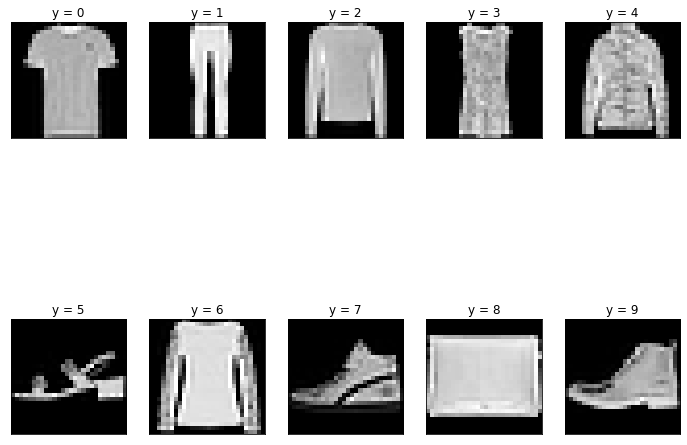

In [5]:
fig, axes = plt.subplots(figsize = (12, 10), nrows = 2, ncols = 5)
rnd = np.random.RandomState(0)
for label, ax in zip(np.unique(y_train), axes.flatten()):
    subset = X_train[y_train == label]
    index = rnd.choice(subset.shape)
    ax.imshow(subset[index - 1], cmap = plt.cm.gray)
    ax.set(title = f'y = {label}', xticks = [], yticks = [])
plt.show()

1. Hãy tạo một model có cấu trúc sau và train thử:
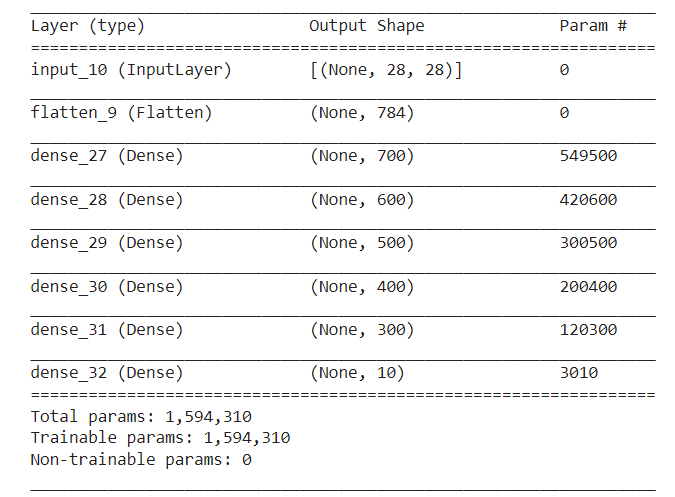

In [6]:
inputs =  tf.keras.layers.Input(shape = (28, 28))
flatten = tf.keras.layers.Flatten()(inputs)
dense_1 = tf.keras.layers.Dense(units = 700, activation = "relu")(flatten)
dense_2 = tf.keras.layers.Dense(units = 600, activation = "sigmoid")(dense_1)
dense_3 = tf.keras.layers.Dense(units = 500, activation = "relu")(dense_2)
dense_4 = tf.keras.layers.Dense(units = 400, activation = "sigmoid")(dense_3)
dense_5 = tf.keras.layers.Dense(units = 300, activation = "relu")(dense_4)
outputs = tf.keras.layers.Dense(units = 10, activation = "softmax")(dense_5)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 700)               549500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               420600    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3, momentum = 0.9),
    loss = tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=["accuracy"]
)

In [9]:
history = model.fit(
    x = X_train, y = y_train, 
    validation_data = (X_valid, y_valid),
    batch_size = 50, epochs = 10, verbose = True)

Epoch 1/10
1080/1080 [==============================] - 8s 5ms/step - loss: 1.0141 - accuracy: 0.6966 - val_loss: 0.5846 - val_accuracy: 0.7943
Epoch 2/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.5296 - accuracy: 0.8109 - val_loss: 0.4883 - val_accuracy: 0.8332
Epoch 3/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.4744 - accuracy: 0.8286 - val_loss: 0.4589 - val_accuracy: 0.8393
Epoch 4/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.4544 - accuracy: 0.8353 - val_loss: 0.4566 - val_accuracy: 0.8435
Epoch 5/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.4376 - accuracy: 0.8429 - val_loss: 0.4557 - val_accuracy: 0.8312
Epoch 6/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.4302 - accuracy: 0.8451 - val_loss: 0.4511 - val_accuracy: 0.8288
Epoch 7/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.4240 - accuracy: 0.8460 - val_loss: 0.4183 - val_accuracy:

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
  <script id="MathJax-script" async
          src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js">
  </script>
2. Nêu cách tính số Param # <br/>
Các lớp của mạng (ngoại trừ lớp Input và lớp Flatten, hai lớp này không có param), đều là các lớp Fully Connected, tức nếu ta gọi \\( x_{i - 1} \\) là output của lớp thứ \\( (i - 1) \\) thì output \\( x_i \\) của lớp tiếp theo được tính như sau: 
<center>
    \\( x_i = g_i(W_i x_{i - 1} + b_i) \\)
</center> 
trong đó
<ul>
    <li> \\( W_i \\) là ma trận trọng số của lớp i </li>
    <li> \\( b_i \\) là vectơ bias của lớp i </li>
    <li> \\( g_i \\) là hàm activation của lớp i </li>
</ul>
Như vậy tổng số param ở lớp thứ i được tính như sau:
<center>
    \\( p_i = u_i * u_{i - 1} + u_i \\)
</center>
trong đó
<ul>
    <li> \\( p_i \\) là số lượng param ở lớp thứ \\( i \\)</li>
    <li> 
        \\( u_i \\) là số lượng unit ở lớp thứ i và 
        \\( u_{i - 1} \\) là số lượng unit ở lớp trước đó 
    </li>
</ul>
Trong công thức trên, \\( u_i * u_{i - 1} \\) là số lượng param của ma trận \\( W_i \\) và \\( u_i \\) là số lượng param của vectơ bias \\( b_i \\)<br/>
Áp dụng công thức này, ta tính được số lượng param cho mạng như sau:
\begin{array} {|c|c|}
\hline \text{Tên lớp} & \text{Số unit của lớp} & \text{Số unit của lớp trước đó} & \text{Số lượng param} \\ 
\hline \text{dense} & 700 & 784 & 700 \cdot 784 + 700 = 549500 \\ 
\hline \text{dense_1} & 600 & 700 & 600 \cdot 700 + 600 = 420600 \\ 
\hline \text{dense_2} & 500 & 600 & 500 \cdot 600 + 500 = 300500 \\ 
\hline \text{dense_3} & 400 & 500 & 400 \cdot 500 + 400 = 200400 \\ 
\hline \text{dense_4} & 300 & 400 & 300 \cdot 400 + 300 = 120300 \\ 
\hline \text{dense_5} & 10 & 300 & 10 \cdot 300 + 10 = 3010 \\ 
\hline
\end{array}

3. Tính độ chính xác trên tập test

In [10]:
evaluation = model.evaluate(X_test, y_test)
print("Model có độ chính xác là {} và loss là {} trên tập test".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4292 - accuracy: 0.8458
Model có độ chính xác là 0.84579998254776 và loss là 0.4291606843471527 trên tập test
